In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white",font_scale = 1.5)
# Set the font to Times new roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
from scipy.signal import savgol_filter
from scipy.signal import medfilt

In [ ]:
# Assuming your hyperspectral data is stored in a NumPy array called 'data'
# Each row represents a sample and each column represents a wavelength

# Smoothing using a running average
def running_average(data, window_size):
    smoothed_data = np.zeros_like(data)
    for i in range(len(data)):
        smoothed_data[i] = np.convolve(data[i], np.ones(window_size)/window_size, mode='same')
    return smoothed_data

# Smoothing using Savitzky-Golay filter
def savitzky_golay(data, window_size, order):
    smoothed_data = np.zeros_like(data)
    for i in range(len(data)):
        smoothed_data[i] = savgol_filter(data[i], window_size, order)
    return smoothed_data

In [ ]:
def remove_noisy_features(df, noisy_features):
    """
    Removes a list of features from a DataFrame.

    Parameters:
        df (pandas.DataFrame): A DataFrame containing the spectral bands to filter.
        noisy_features (list of str, int or float): A list of column names or indices to remove.

    Returns:
        pandas.DataFrame: A DataFrame with the selected columns removed.
    """
    # Convert column names or floats to integers
    if isinstance(noisy_features[0], str):
        noisy_indices = [df.columns.get_loc(f) for f in noisy_features]
    else:
        noisy_indices = [int(f) for f in noisy_features]

    # Remove selected columns
    filtered_df = df.drop(df.columns[noisy_indices], axis=1)

    return filtered_df

In [ ]:
path = "/content/drive/MyDrive/LWP_Netanel/Raw_data.csv"
df = pd.read_csv(path)
# delete first column
df = df.iloc[:, 1:]
df

1         2         3         4         5         6         7  \
0    0.054968  0.056838  0.043978  0.035256  0.035786  0.031981  0.028707   
1    0.059544  0.051406  0.050085  0.036634  0.032170  0.032174  0.029566   
2    0.060377  0.053173  0.052271  0.039355  0.034712  0.034969  0.032656   
3    0.025721  0.021168  0.016549  0.012552  0.009066  0.010161  0.006912   
4    0.058899  0.050909  0.049371  0.037669  0.033746  0.033636  0.031091   
..        ...       ...       ...       ...       ...       ...       ...   
241  0.035554  0.048186  0.024956  0.022671  0.016717  0.016824  0.013209   
242  0.038225  0.053014  0.031914  0.029043  0.024605  0.025351  0.021344   
243  0.012618  0.016818  0.010124  0.010072  0.007825  0.008208  0.006508   
244  0.060408  0.044373  0.033857  0.033211  0.024441  0.025812  0.025180   
245  0.033781  0.029089  0.018319  0.018981  0.015357  0.016433  0.012725   

            8         9        10  ...       270       271       272  \
0    0.025164  0.024833  0.022339  ...  0.214277  0.210605  0.254922   
1    0.024523  0.025367  0.021757  ...  0.309574  0.312944  0.369701   
2    0.027322  0.027914  0.024112  ...  0.256828  0.260854  0.304785   
3    0.007294  0.006002  0.005871  ...  0.028218  0.024595  0.029087   
4    0.026078  0.027025  0.023256  ...  0.244081  0.244632  0.293387   
..        ...       ...       ...  ...       ...       ...       ...   
241  0.014621  0.012951  0.011683  ...  0.272404  0.249416  0.232999   
242  0.023296  0.022493  0.019705  ...  0.302281  0.275660  0.260988   
243  0.007149  0.006805  0.006113  ...  0.118087  0.108291  0.101918   
244  0.022695  0.020085  0.020026  ...  0.215192  0.240629  0.245143   
245  0.014643  0.013809  0.012569  ...  0.179458  0.164059  0.156825   

          273       274    LWP  English_name  treatment  plot  spectral_date  
0    0.212916  0.242413 -1.150       cypress    drought     5     2022-03-14  
1    0.313495  0.355192 -2.750         carob    drought     5     2022-03-14  
2    0.260842  0.292232 -2.350         carob    drought     6     2022-03-14  
3    0.026958  0.027040 -2.300          pine    control     1     2022-03-14  
4    0.243777  0.281741 -1.620       cypress    drought     6     2022-03-14  
..        ...       ...    ...           ...        ...   ...            ...  
241  0.249456  0.259778 -0.875           oak    control     1     2023-02-13  
242  0.275265  0.285223 -1.261       cypress    control     1     2023-02-13  
243  0.107894  0.111639 -0.906           oak    drought     6     2023-02-13  
244  0.241596  0.245791 -1.960         carob    control     3     2023-02-13  
245  0.164058  0.172584 -1.798         carob    drought     6     2023-02-13  

[246 rows x 279 columns]

In [ ]:
band_dict = {
  1: 398.08,
  2: 400.292,
  3: 402.503,
  4: 404.715,
  5: 406.927,
  6: 409.139,
  7: 411.351,
  8: 413.563,
  9: 415.775,
  10: 417.986,
  11: 420.198,
  12: 422.41,
  13: 424.622,
  14: 426.834,
  15: 429.046,
  16: 431.258,
  17: 433.469,
  18: 435.681,
  19: 437.893,
  20: 440.105,
  21: 442.317,
  22: 444.529,
  23: 446.741,
  24: 448.952,
  25: 451.164,
  26: 453.376,
  27: 455.588,
  28: 457.8,
  29: 460.012,
  30: 462.224,
  31: 464.435,
  32: 466.647,
  33: 468.859,
  34: 471.071,
  35: 473.283,
  36: 475.495,
  37: 477.707,
  38: 479.918,
  39: 482.13,
  40: 484.342,
  41: 486.554,
  42: 488.766,
  43: 490.978,
  44: 493.189,
  45: 495.401,
  46: 497.613,
  47: 499.825,
  48: 502.037,
  49: 504.249,
  50: 506.461,
  51: 508.672,
  52: 510.884,
  53: 513.096,
  54: 515.308,
  55: 517.52,
  56: 519.732,
  57: 521.944,
  58: 524.155,
  59: 526.367,
  60: 528.579,
  61: 530.791,
  62: 533.003,
  63: 535.215,
  64: 537.427,
  65: 539.638,
  66: 541.85,
  67: 544.062,
  68: 546.274,
  69: 548.486,
  70: 550.698,
  71: 552.91,
  72: 555.121,
  73: 557.333,
  74: 559.545,
  75: 561.757,
  76: 563.969,
  77: 566.181,
  78: 568.393,
  79: 570.604,
  80: 572.816,
  81: 575.028,
  82: 577.24,
  83: 579.452,
  84: 581.664,
  85: 583.876,
  86: 586.087,
  87: 588.299,
  88: 590.511,
  89: 592.723,
  90: 594.935,
  91: 597.147,
  92: 599.359,
  93: 601.57,
  94: 603.782,
  95: 605.994,
  96: 608.206,
  97: 610.418,
  98: 612.63,
  99: 614.842,
  100: 617.053,
  101: 619.265,
  102: 621.477,
  103: 623.689,
  104: 625.901,
  105: 628.113,
  106: 630.325,
  107: 632.536,
  108: 634.748,
  109: 636.96,
  110: 639.172,
  111: 641.384,
  112: 643.596,
  113: 645.808,
  114: 648.019,
  115: 650.231,
  116: 652.443,
  117: 654.655,
  118: 656.867,
  119: 659.079,
  120: 661.291,
  121: 663.502,
  122: 665.714,
  123: 667.926,
  124: 670.138,
  125: 672.35,
  126: 674.562,
  127: 676.774,
  128: 678.985,
  129: 681.197,
  130: 683.409,
  131: 685.621,
  132: 687.833,
  133: 690.045,
  134: 692.257,
  135: 694.468,
  136: 696.68,
  137: 698.892,
  138: 701.104,
  139: 703.316,
  140: 705.528,
  141: 707.74,
  142: 709.951,
  143: 712.163,
  144: 714.375,
  145: 716.587,
  146: 718.799,
  147: 721.011,
  148: 723.223,
  149: 725.434,
  150: 727.646,
  151: 729.858,
  152: 732.07,
  153: 734.282,
  154: 736.494,
  155: 738.706,
  156: 740.917,
  157: 743.129,
  158: 745.341,
  159: 747.553,
  160: 749.765,
  161: 751.977,
  162: 754.189,
  163: 756.4,
  164: 758.612,
  165: 760.824,
  166: 763.036,
  167: 765.248,
  168: 767.46,
  169: 769.672,
  170: 771.883,
  171: 774.095,
  172: 776.307,
  173: 778.519,
  174: 780.731,
  175: 782.943,
  176: 785.155,
  177: 787.366,
  178: 789.578,
  179: 791.79,
  180: 794.002,
  181: 796.214,
  182: 798.426,
  183: 800.638,
  184: 802.849,
  185: 805.061,
  186: 807.273,
  187: 809.485,
  188: 811.697,
  189: 813.909,
  190: 816.121,
  191: 818.332,
  192: 820.544,
  193: 822.756,
  194: 824.968,
  195: 827.18,
  196: 829.392,
  197: 831.604,
  198: 833.815,
  199: 836.027,
  200: 838.239,
  201: 840.451,
  202: 842.663,
  203: 844.875,
  204: 847.087,
  205: 849.298,
  206: 851.51,
  207: 853.722,
  208: 855.934,
  209: 858.146,
  210: 860.358,
  211: 862.57,
  212: 864.781,
  213: 866.993,
  214: 869.205,
  215: 871.417,
  216: 873.629,
  217: 875.841,
  218: 878.053,
  219: 880.264,
  220: 882.476,
  221: 884.688,
  222: 886.9,
  223: 889.112,
  224: 891.324,
  225: 893.536,
  226: 895.747,
  227: 897.959,
  228: 900.171,
  229: 902.383,
  230: 904.595,
  231: 906.807,
  232: 909.019,
  233: 911.23,
  234: 913.442,
  235: 915.654,
  236: 917.866,
  237: 920.078,
  238: 922.29,
  239: 924.502,
  240: 926.713,
  241: 928.925,
  242: 931.137,
  243: 933.349,
  244: 935.561,
  245: 937.773,
  246: 939.985,
  247: 942.196,
  248: 944.408,
  249: 946.62,
  250: 948.832,
  251: 951.044,
  252: 953.256,
  253: 955.468,
  254: 957.679,
  255: 959.891,
  256: 962.103,
  257: 964.315,
  258: 966.527,
  259: 968.739,
  260: 970.951,
  261: 973.162,
  262: 975.374,
  263: 977.586,
  264: 979.798,
  265: 982.01,
  266: 984.222,
  267: 986.434,
  268: 988.645,
  269: 990.857,
  270: 993.069,
  271: 995.281,
  272: 997.493,
  273: 999.705,
  274: 1001.92}

# Create a new dictionary with string keys
band_dict = {str(key): value for key, value in band_dict.items()}

# Create a new dictionary with integer values
band_dict = {key: int(value) for key, value in band_dict.items()}

In [ ]:
# Rename columns based on the dictionary mapping
df = df.rename(columns=band_dict)

# Drop the row from df that '398' col have value of 1
df = df[df[398] != 1]

In [ ]:
df.columns

Index([            398,             400,             402,             404,
                   406,             409,             411,             413,
                   415,             417,
       ...
                   993,             995,             997,             999,
                  1001,           'LWP',  'English_name',     'treatment',
                'plot', 'spectral_date'],
      dtype='object', length=279)

In [ ]:
# drop nan based on the column of bands
bands_df = df[df.columns[:-5]]

df.dropna(subset=bands_df.columns, inplace=True)
df.shape

(245, 279)

In [ ]:
lwp_vals = df['LWP'].values

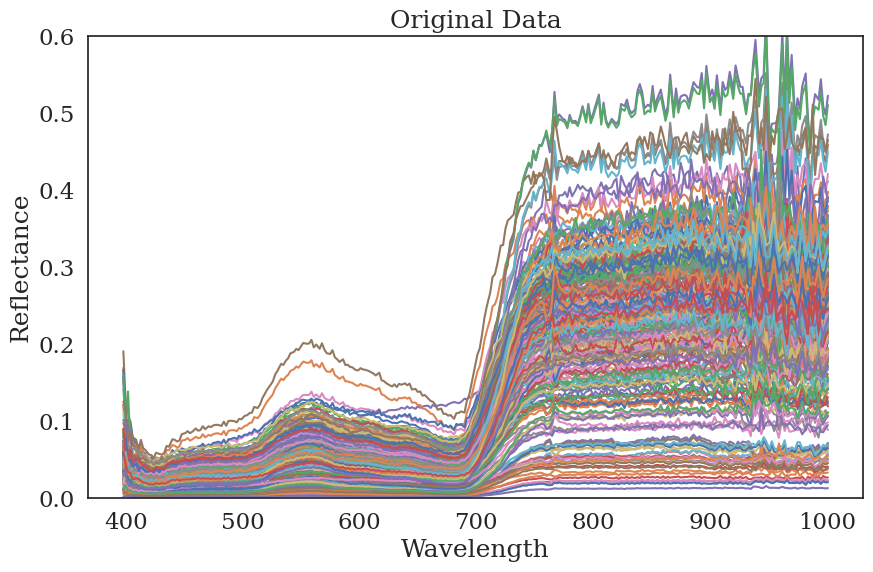

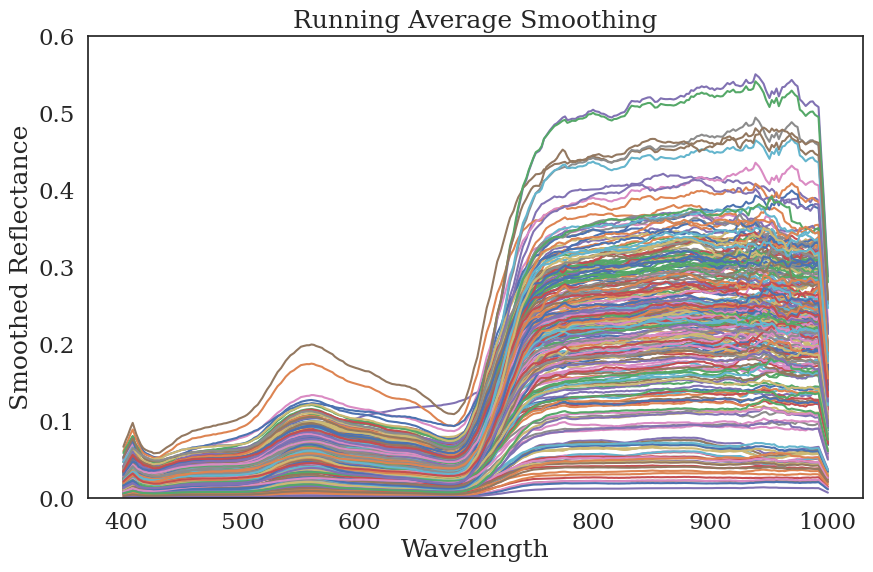

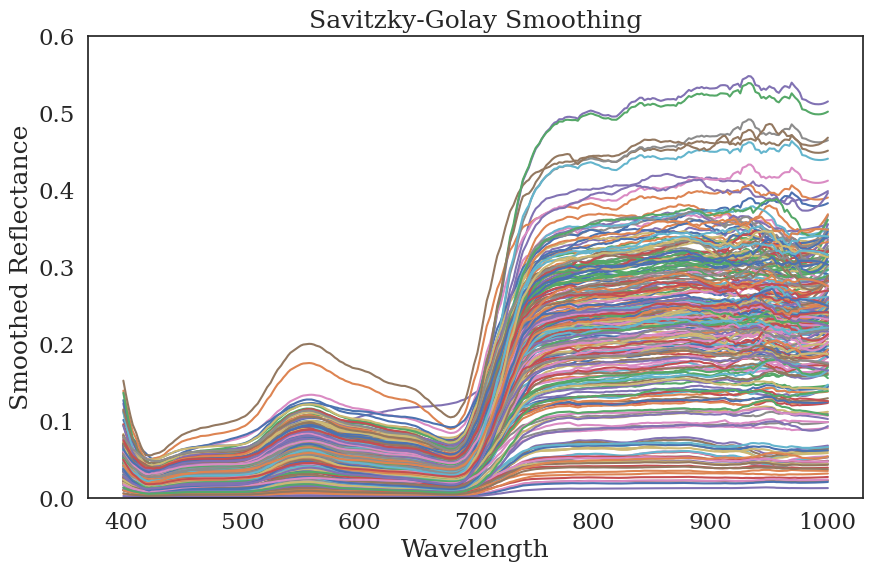

In [ ]:
# Parameters for smoothing
running_avg_window_size = 9
sg_window_size = 20
sg_poly_order = 2

# define df of the bands data
data = bands_df.dropna()

# Define colors dict
color_dict = {
    'pine': 'seagreen',
    'oak': 'lawngreen',
    'cypress': 'tomato',
    'carob': 'goldenrod',
    'pistacia': 'gold'
}

# Convert the data to a NumPy array
data = data.to_numpy()

# Apply running average smoothing
smoothed_data_running_avg = running_average(data, running_avg_window_size)

# Apply Savitzky-Golay smoothing
smoothed_data_sg = savitzky_golay(data, sg_window_size, sg_poly_order)

# Plotting the smoothed data
num_samples = len(data)

# Plot for running average smoothed data
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(bands_df.columns,data[i], label=f'Sample {i+1}')
plt.title('Original Data')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
# plt.legend()
plt.ylim(0,.6)
plt.show()

plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(bands_df.columns,smoothed_data_running_avg[i], label=f'Sample {i+1}')
plt.title('Running Average Smoothing')
plt.xlabel('Wavelength')
plt.ylabel('Smoothed Reflectance')
# plt.legend()
plt.ylim(0,.6)
plt.show()

plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(bands_df.columns,smoothed_data_sg[i], label=f'Sample {i+1}')
plt.title('Savitzky-Golay Smoothing')
plt.xlabel('Wavelength')
plt.ylabel('Smoothed Reflectance')
plt.ylim(0,.6)
# plt.legend()
plt.show()

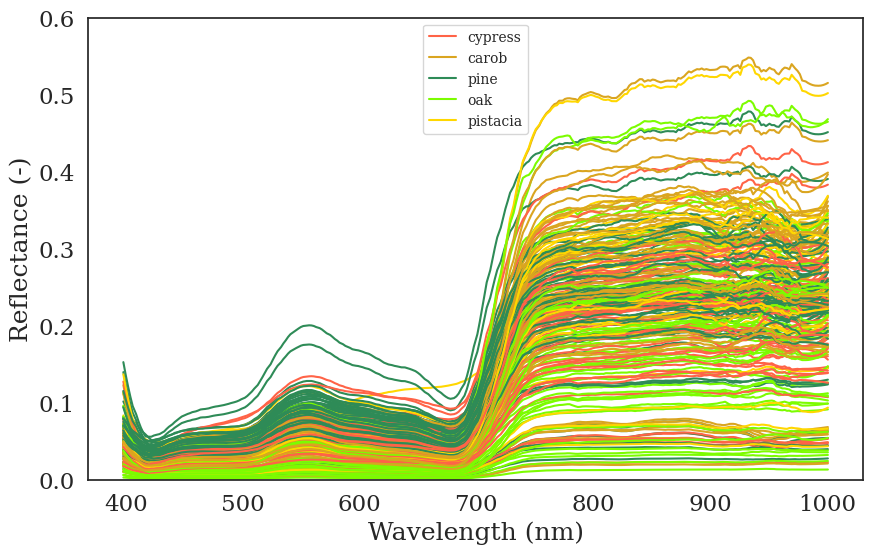

In [ ]:
# Plotting the smoothed data
num_samples = len(data)

# Function to plot with colors based on species
def plot_with_species_colors(data_to_plot, title):
    plt.figure(figsize=(10, 6))
    for i in range(num_samples):
        species = df['English_name'].iloc[i]
        color = color_dict.get(species.lower(), 'gray')  # Default to gray if species not in dict
        plt.plot(bands_df.columns, data_to_plot[i], color=color, label=species)

    # plt.title(title)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance (-)')
    plt.ylim(0, 0.6)

    # Create legend with unique species
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc = 'upper center', fontsize =10)
    # plt.grid(True)

    plt.show()

# Plot for original data
plot_with_species_colors(data, 'Original Data')

# Plot for running average smoothed data
plot_with_species_colors(smoothed_data_running_avg, 'Running Average Smoothing')

# Plot for Savitzky-Golay smoothed data
plot_with_species_colors(smoothed_data_sg, 'Savitzky-Golay Smoothing')

In [ ]:
# Function to plot with species colors
def plot_with_species_colors(ax, data_to_plot, show_legend=False):
    for i in range(len(data_to_plot)):
        species = df['English_name'].iloc[i]
        color = color_dict.get(species.lower(), 'gray')  # Default to gray if species not in dict
        ax.plot(bands_df.columns, data_to_plot[i], color=color, label=species)

    ax.set_ylabel('Reflectance (-)')
    ax.set_ylim(0, 0.6)

    if show_legend:
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), loc='upper center',
                  bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=10)

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot original data
plot_with_species_colors(ax1, data, show_legend=True)
ax1.text(0.05, 0.95, 'a', transform=ax1.transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

# Plot Savitzky-Golay smoothed data
plot_with_species_colors(ax2, smoothed_data_sg)
ax2.text(0.05, 0.95, 'b', transform=ax2.transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

# Set x-label only for the bottom subplot
ax2.set_xlabel('Wavelength (nm)')

# Adjust layout and show plot
plt.tight_layout()

# Save the figure as a high-resolution image
fig.savefig("species_reflectance_comparison_high_res.png",
            format="png",
            dpi=600,
            bbox_inches="tight")

plt.show()

Exporet to CSV

In [ ]:
updated_data = pd.DataFrame(smoothed_data_sg,columns = df.columns[:-5])

# # Get the columns from df2 that are not in df1
columns_to_merge = list(set(df.columns) - set(updated_data.columns))

# # Merge the columns from df2 into df1
updated_data[columns_to_merge]= df[columns_to_merge].values

updated_data['LWP'] = lwp_vals


# # Export the updated df1
updated_data.to_csv("/content/drive/MyDrive/LWP_Netanel/Sg_clean_data.csv",index=False)

In [ ]:
updated_data

398       400       402       404       406       409       411  \
0    0.056986  0.051272  0.046001  0.041172  0.036785  0.032840  0.029338   
1    0.058759  0.053196  0.048060  0.043349  0.039063  0.035203  0.031768   
2    0.022455  0.019661  0.017084  0.014725  0.012584  0.010661  0.008955   
3    0.056687  0.051226  0.046198  0.041603  0.037441  0.033712  0.030417   
4    0.022415  0.019453  0.016720  0.014216  0.011942  0.009898  0.008083   
..        ...       ...       ...       ...       ...       ...       ...   
240  0.037854  0.033429  0.029375  0.025693  0.022381  0.019441  0.016872   
241  0.042819  0.038807  0.035169  0.031907  0.029020  0.026507  0.024369   
242  0.013891  0.012588  0.011396  0.010316  0.009346  0.008488  0.007741   
243  0.049915  0.044643  0.039817  0.035437  0.031504  0.028017  0.024976   
244  0.028698  0.025888  0.023326  0.021012  0.018945  0.017126  0.015554   

          413       415       417  ...       993       995       997  \
0    0.026278  0.023660  0.021485  ...  0.327153  0.330478  0.334300   
1    0.028759  0.026176  0.024018  ...  0.271355  0.273903  0.276832   
2    0.007468  0.006198  0.005145  ...  0.026978  0.027121  0.027282   
3    0.027554  0.025125  0.023129  ...  0.257415  0.260070  0.263109   
4    0.006498  0.005143  0.004017  ...  0.022074  0.022232  0.022414   
..        ...       ...       ...  ...       ...       ...       ...   
240  0.014674  0.012847  0.011391  ...  0.254123  0.253133  0.252045   
241  0.022606  0.021218  0.020205  ...  0.281425  0.280196  0.278753   
242  0.007105  0.006580  0.006166  ...  0.110415  0.109811  0.109198   
243  0.022381  0.020232  0.018530  ...  0.240941  0.241184  0.241376   
244  0.014230  0.013154  0.012326  ...  0.168240  0.167605  0.166947   

          999      1001    LWP  spectral_date  treatment  plot  English_name  
0    0.338619  0.343433 -2.750     2022-03-14    drought     5         carob  
1    0.280141  0.283831 -2.350     2022-03-14    drought     6         carob  
2    0.027462  0.027660 -2.300     2022-03-14    control     1          pine  
3    0.266533  0.270341 -1.620     2022-03-14    drought     6       cypress  
4    0.022618  0.022844 -1.130     2022-03-14    control     1       cypress  
..        ...       ...    ...            ...        ...   ...           ...  
240  0.250859  0.249576 -0.875     2023-02-13    control     1           oak  
241  0.277096  0.275225 -1.261     2023-02-13    control     1       cypress  
242  0.108575  0.107943 -0.906     2023-02-13    drought     6           oak  
243  0.241517  0.241606 -1.960     2023-02-13    control     3         carob  
244  0.166267  0.165566 -1.798     2023-02-13    drought     6         carob  

[245 rows x 279 columns]

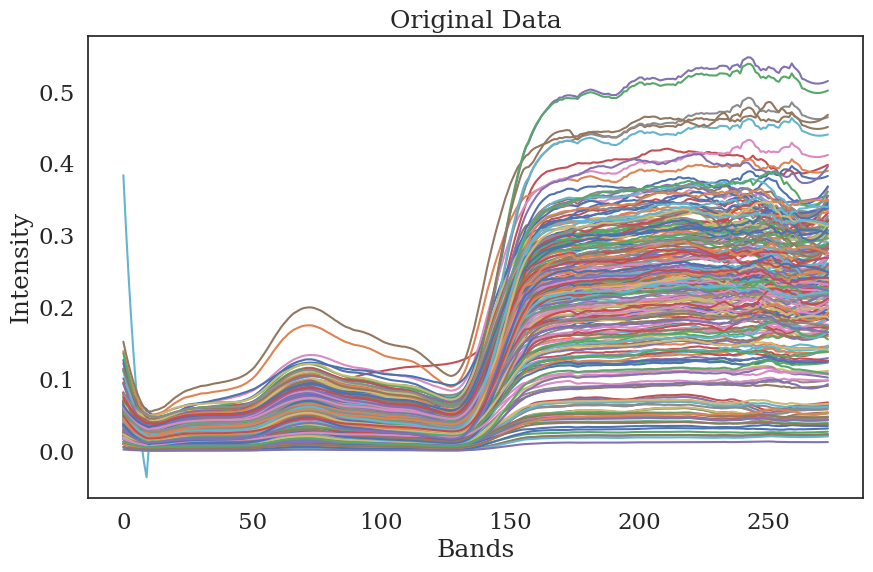

In [ ]:

data = updated_data[bands_df.columns].dropna()

# Convert the data to a NumPy array
data = data.to_numpy()

# Plotting the smoothed data
num_samples = len(data)

# Plot for running average smoothed data
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.plot(data[i], label=f'Sample {i+1}')
plt.title('Original Data')
plt.xlabel('Bands')
plt.ylabel('Intensity')
# plt.legend()
plt.show()